In [ ]:
import numpy as np
import pandas as pd
import scipy.io as sc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [20]:
data = sc.loadmat("data.mat")
X = data['Xval']
y = data['yval']

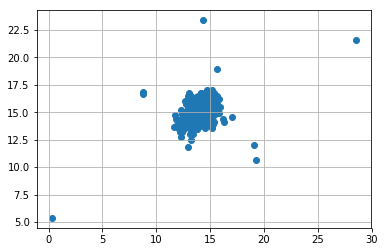

In [21]:
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

array([6, 4, 1, 0, 4, 4, 6, 4, 0, 6, 0, 6, 6, 0, 6, 1, 4, 6, 6, 1, 4, 0,
       6, 1, 4, 4, 0, 6, 1, 4, 6, 1, 4, 6, 4, 4, 0, 0, 1, 4, 1, 1, 6, 4,
       6, 6, 1, 1, 4, 0, 1, 6, 4, 1, 1, 6, 6, 4, 4, 6, 6, 4, 4, 4, 1, 6,
       0, 6, 1, 1, 6, 4, 1, 6, 6, 4, 1, 1, 0, 1, 4, 1, 4, 6, 6, 6, 0, 0,
       4, 6, 4, 0, 4, 6, 0, 1, 4, 1, 4, 6, 0, 6, 6, 4, 4, 1, 1, 6, 0, 4,
       6, 6, 0, 6, 1, 6, 1, 0, 6, 6, 4, 6, 6, 0, 6, 4, 1, 0, 6, 1, 6, 1,
       0, 6, 4, 6, 0, 1, 0, 4, 1, 1, 4, 1, 4, 4, 6, 1, 0, 4, 4, 6, 0, 6,
       1, 6, 4, 6, 0, 6, 4, 1, 1, 1, 1, 0, 6, 4, 0, 4, 1, 1, 1, 0, 0, 4,
       0, 0, 4, 4, 6, 1, 0, 1, 4, 1, 1, 6, 0, 4, 0, 6, 0, 1, 0, 4, 4, 4,
       4, 1, 1, 6, 6, 1, 4, 0, 1, 4, 6, 1, 6, 1, 4, 0, 6, 4, 0, 4, 1, 4,
       6, 6, 4, 6, 0, 1, 4, 4, 4, 6, 0, 1, 4, 6, 0, 6, 1, 1, 1, 1, 6, 0,
       0, 6, 4, 1, 1, 4, 1, 6, 6, 6, 1, 6, 1, 6, 0, 0, 4, 1, 6, 0, 0, 4,
       4, 6, 4, 0, 6, 4, 6, 0, 6, 1, 0, 0, 1, 0, 0, 4, 1, 1, 0, 6, 4, 0,
       1, 0, 1, 6, 6, 1, 1, 0, 6, 0, 1, 1, 6, 1, 5,

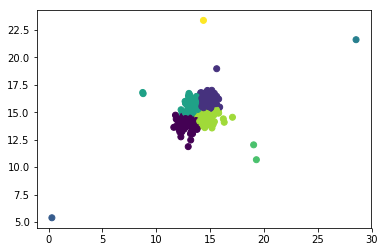

In [31]:
y_pred = KMeans(n_clusters=8, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
y_pred

In [34]:
count = {}
for i in range(8):
    count[i] = 0

for point in y_pred:
    count[point] += 1

for i in range(len(y_pred)):
    if count[y_pred[i]] < 5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [35]:
def f1_score(act, pred):

    tp = len([[x,y] for x,y in zip(act, pred) if x==y and y==1])
    fp = len([[x,y] for x,y in zip(act, pred) if x!=y and x==0])
    fn = len([[x,y] for x,y in zip(act, pred) if x!=y and x==1])

    print('True positive:', tp)
    print('False positive:', fp)
    print('False negative:', fn)
    
    if tp>0:
        p=float(tp)/(tp+fp)
        r=float(tp)/(tp+fn)

        return 200*((p*r)/(p+r))
    else:
        return 0
    
f1_score(y, y_pred)

True positive: 5
False positive: 0
False negative: 4


71.42857142857143